In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Loading The DATA and checking

In [2]:
iris = load_iris()
X = iris.data   #reading the data into x as numberical values
y = iris.target #reading the data as numerical value because sometimes the ALGO's can;t read the heading or catagorical data
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
#putting all the data into matrix as a standard data
X_std = StandardScaler().fit_transform(X)
print(X_std)
#print(X_std.shape)#-> 150,4

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## Main Algorithm for calculating 
1. Standardize the data and load the data
2. Obtain the EigenVectors and EigenValues from the covariance matrix or correaltion matrix or perform Singular Vector Decomposition
3. Sort EigenValues in descending order and choose the K EigenVector that correspond to the K largest EigenValues where K is the number of dimensions of the new feature subspace ( K <= d )
4. Construct the projection matrix W from the selected K EigenVectors
5. Transfrom the orignal dataset X via W to obtain a K- dimensional feature subspace Y

In [4]:
#Covariance matrix

import numpy as np
mean_vec = np.mean(X_std,axis = 0)#mean throughout the rows
print(mean_vec)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)#Formula for covariance matrix
print('Covariance matrix')
print(cov_mat)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Covariance matrix
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [5]:
#Alternative
cov_mat = np.cov(X_std.T)#predefined function
#maths works slow becuse of looping 
#library works faster because 'APPLY' is used, a technique in DATA SCIENCE
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

## EIGENDECOMPOSTION - Computing Eigen Vectors and Eigen Values
1. The EigenVectors(principal components) determine the directors of the new featurespace and the eigenValues determine their magnitudes.
2. In other words the EigenValues explain the variance of data along the new feature axis.

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)#linear algebra

print("Eigen Vectors\n%s" %eig_vecs)
print("\nEigen Values\n%s" %eig_vals)

Eigen Vectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigen Values
[2.93808505 0.9201649  0.14774182 0.02085386]


## Selecting Principal Components
1. In order to decide which EigenVectors can dropped without loosing too much info for the construction of lower- dimensional subspace we need to inspect the corresponding EigenValues: The EigenVectors with the lowest EigenValues bear the least info about the distribution of the data those are the ones that can be dropped

In [7]:
#sort the eigen values in descending order\
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])for i in range(len(eig_vals))]

for i in eig_pairs:
    print(i[0])

2.938085050199996
0.9201649041624884
0.1477418210449481
0.020853862176462304


## Expalined Variance
After Sorting the EigenPairs the next question is 
"How many principal components are we going to choose for our new feature subspace?"
A useful measure is the so called 'Explained Vriance' which can be calculated from the EigenValues. The Explained Variance tells us how much information(variance) can be ttributed to each of the principal components

In [8]:
tot = sum(eig_vals)#sum calc

var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse =True)]#sorting the values of eig
print (var_exp)

[72.96244541329985, 22.850761786701778, 3.668921889282875, 0.5178709107154802]


In [9]:
cum_var_exp = np.cumsum(var_exp)

In [10]:
#just cumsum explaination
li = [1,2,3,4,5]
print(np.cumsum(li))

[ 1  3  6 10 15]


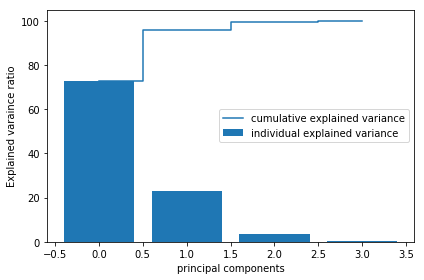

In [11]:
import matplotlib.pyplot as plt

plt.bar(range(4),var_exp,align = 'center',label = 'individual explained variance')
plt.step(range(4),cum_var_exp,where = 'mid',label = 'cumulative explained variance')
plt.ylabel ('Explained varaince ratio')
plt.xlabel('principal components')
plt . legend(loc ='best')
plt.tight_layout()

#bar shows the explained variance
#step shows the cumsum variance , explained variance + cum_var_exp
#first two bars are important only

In [12]:
for i in eig_pairs:
    print(i)

(2.938085050199996, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(0.9201649041624884, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(0.1477418210449481, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(0.020853862176462304, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [14]:
m1 = np.arange(1,10,1).reshape(3,3)
m2 = np.arange(3,12,1).reshape(3,3)
print(m1)
print(m2)
print(np.hstack([m1,m2]))
print(np.vstack([m1,m2]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 1  2  3  3  4  5]
 [ 4  5  6  6  7  8]
 [ 7  8  9  9 10 11]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [15]:
#take a sequence of array and stack them horizontally to make a single array (MATRIX)
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
print(matrix_w)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


## PROJECTION ONTO NEW FEATURES SPACE

in this last step we will use the 4x2 dimensional projection matrix w to transform aur samples onto the new subspace via th eequation 
Y = X + W where Y is a 150x2 matrix of our transformed samples 

In [17]:
X_std.shape,matrix_w.shape

((150, 4), (4, 2))

In [18]:
Y = X_std.dot(matrix_w)

In [19]:
Y.shape

(150, 2)

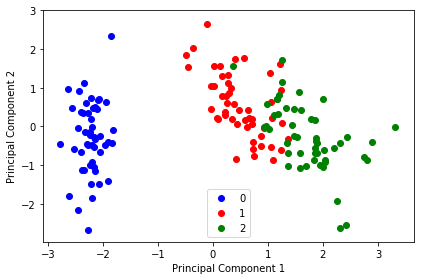

In [23]:
colors = ['blue', 'red', 'green']
for lab,col in zip (np.unique(y), colors):#
    plt.scatter(Y[y==lab,0],Y[y==lab,1],label = lab, c = col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'lower center')
plt.tight_layout()
plt.show()


## Shortcut - PCA in scikit-learn


In [25]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_std)


In [27]:
X_train_pca.shape

(150, 2)

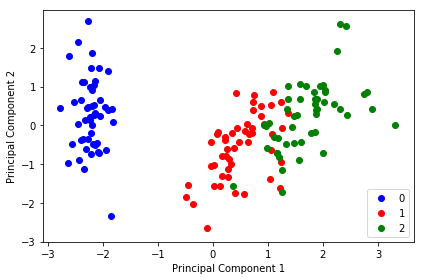

In [29]:
import numpy as np
from matplotlib import pyplot as plt
colors = ['blue', 'red', 'green']

for lab, col in zip(np.unique(y),colors):
    plt.scatter(X_train_pca[y==lab,0],X_train_pca[y==lab,1],label = lab, c = col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
